# Introduction

This script focuses on understanding historical revenue data. In this script, we will use a high-quality Kaggle dataset. This analysis and it's conclusion will then be used to create an Insights and Suggestions Presentation.

# Setting Up The Environment

## Importing Python Libraries

In [1]:
# loading libraries
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# checking if all the libraries imported successfully or not
print("Imported Successfully!")

Imported Successfully!


## Loading The Dataset

In [2]:
# Loading the data
data = pd.read_csv(r"C:\Users\Anshika Kashyap\Desktop\Anshika\portfolio\project 1\coffee_shop_revenue.csv")

# checking if datasets have been loaded successfully
print("Dataset Loaded Successfully!")

# data = pd.read_csv("coffee_shop_revenue.csv")  # change to this later

Dataset Loaded Successfully!


## Setting Up The SQLite Database

In [3]:
# connecting to database
dataset = sqlite3.connect("coffee_shop_revenue.db")
cursor = dataset.cursor()

# saving the DataFrame to a SQL table
data.to_sql("coffee_shop", dataset, if_exists="replace", index=False)

# checking if database got constructed or not
print("Database and Table constructed successfully!")

Database and Table constructed successfully!


# Data Exploration

## Skimming The Dataset

In [4]:
# printing shapes of dataset
print(data.shape)

(2000, 7)


There are 07 columns and 2000 rows in the dataset.

In [5]:
# going through data's top rows
query1 = """
SELECT *
FROM coffee_shop
LIMIT 5;
"""
pd.read_sql(query1, dataset)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [6]:
# going through data's last rows
query2 = """
SELECT *
FROM coffee_shop
ORDER BY ROWID DESC
LIMIT 5;
"""
pd.read_sql(query2, dataset)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,89,6.88,13,14,78.46,322,914.24
1,403,9.41,7,12,452.49,577,4266.21
2,89,5.28,16,9,376.64,310,951.34
3,105,3.01,11,7,12.62,235,337.97
4,372,6.41,11,4,466.11,913,2816.85


## Examining Dataset Structure

In [7]:
# describing dataset's basic information, i.e., info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


The dataset by default have 0 null values, and correct datatypes assigned to each column.

In [8]:
# checking numeric columns' statistics
data.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


In [9]:
# examining unique values of dataset
data.nunique()

Number_of_Customers_Per_Day     441
Average_Order_Value             694
Operating_Hours_Per_Day          12
Number_of_Employees              13
Marketing_Spend_Per_Day        1967
Location_Foot_Traffic           831
Daily_Revenue                  1998
dtype: int64

There is no categorical column in the whole dataset, as the 'data.info()' stated above.

## Data Visualization

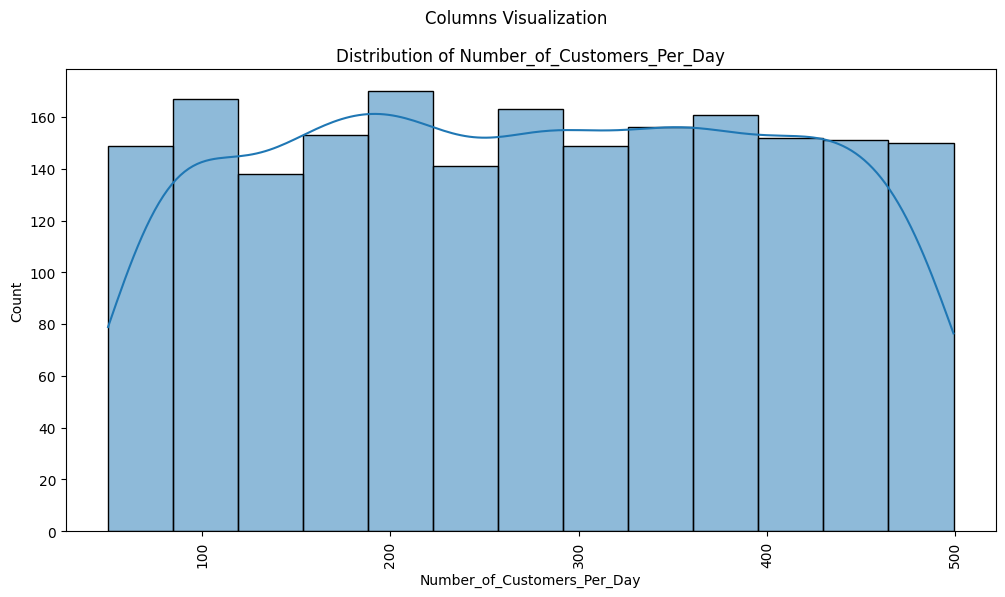

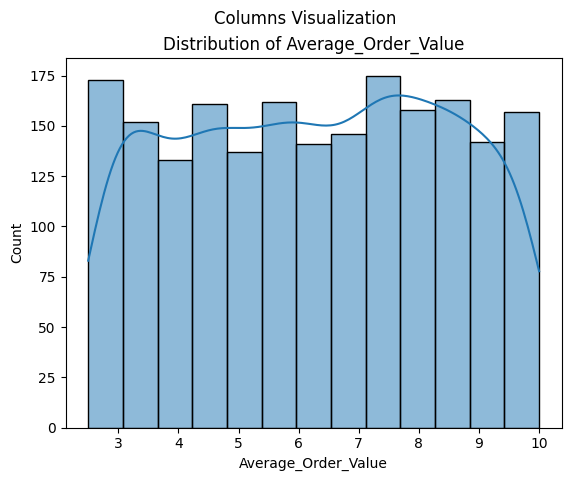

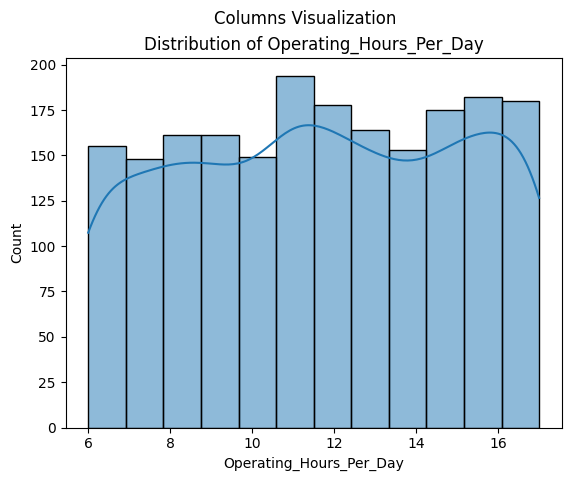

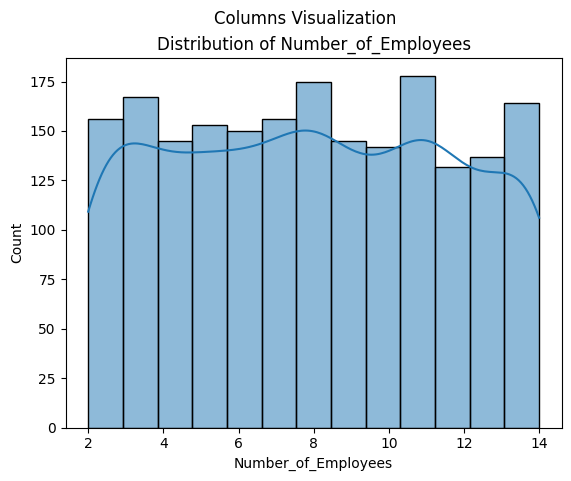

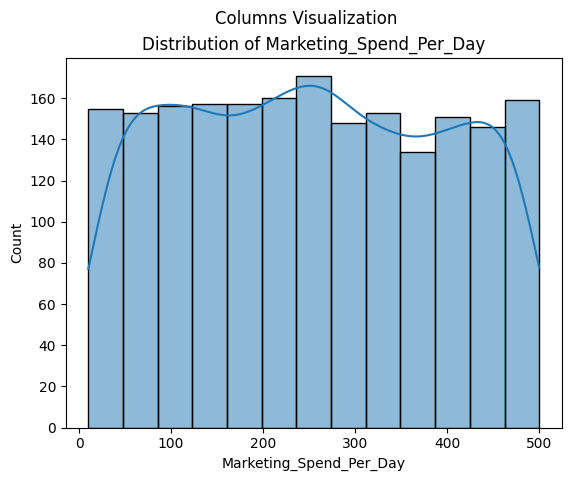

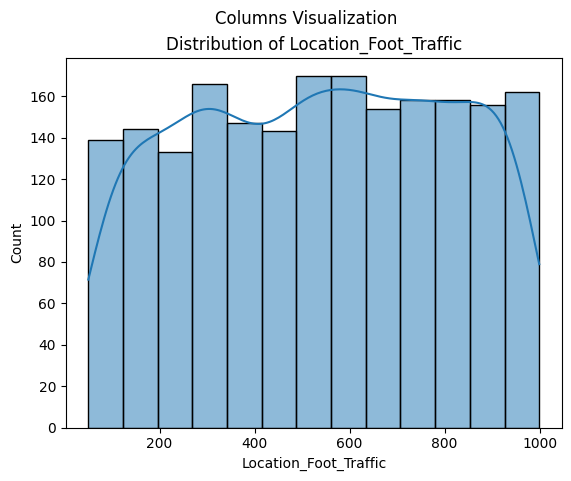

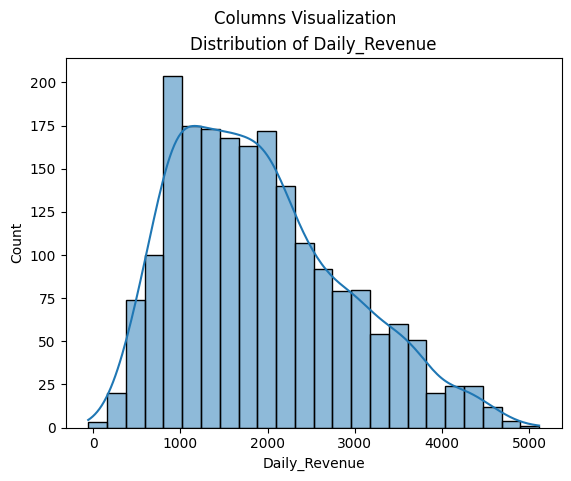

In [10]:
# setting parameters for graphs
plt.figure(figsize=(12, 6))
plt.xticks(rotation=90)

# creating graphs
for col in data:
    sns.histplot(data[col], kde=True)
    plt.suptitle('Columns Visualization')
    plt.title(f"Distribution of {col}")
    plt.show()

## Querying Data To Understand It Better

In [36]:
# checking those rows where revenue is greater than the mean revenue
query3 = """
SELECT *
FROM coffee_shop
WHERE Daily_Revenue > 1917
LIMIT 10;
"""
pd.read_sql(query3, dataset)

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,485,4.50,12,8,57.83,744,2084.68
1,398,9.09,6,6,91.76,636,3118.39
2,320,8.48,17,4,462.63,770,2912.20
3,238,9.00,11,4,331.35,156,2179.13
4,171,7.73,7,5,344.51,135,2025.55
5,264,7.60,13,14,318.08,885,2099.66
6,380,7.14,16,9,140.39,892,2568.92
7,409,9.04,16,5,289.05,947,3618.25
8,180,8.69,17,14,495.90,656,2167.08
9,358,5.01,15,13,348.97,806,2463.86


In [ ]:
# checking the total daily revenue done by the coffee shop in 2000 days
query4 = """
SELECT SUM(Daily_revenue) AS total_revenue FROM coffee_shop;
"""
pd.read_sql(query4, dataset)

,total_revenue
0,3834651.88


In [ ]:
# checking the average daily revenue based on operational hours
query5 = """
SELECT Operating_Hours_Per_Day, AVG(Daily_Revenue) AS avg_revenue
FROM coffee_shop
GROUP BY Operating_Hours_Per_Day
ORDER BY Operating_Hours_Per_Day;
"""
pd.read_sql(query5, dataset)

,Operating_Hours_Per_Day,avg_revenue
0,6,1924.378710
1,7,1929.301486
2,8,1847.814037
3,9,2018.685901
4,10,1854.766242
5,11,1960.089948
6,12,1938.236573
7,13,1880.846402
8,14,1852.569281
9,15,1966.443486


In [51]:
# checking the average daily revenue based on number of employees
query6 = """
SELECT Number_of_Employees, AVG(Daily_Revenue) AS avg_revenue
FROM coffee_shop
GROUP BY Number_of_Employees
ORDER BY Number_of_Employees;
"""
pd.read_sql(query6, dataset)

,Number_of_Employees,avg_revenue
0,2,1850.392821
1,3,1894.754192
2,4,2037.266897
3,5,1941.952549
4,6,1975.301267
5,7,1950.401282
6,8,1842.192343
7,9,1781.255724
8,10,1942.847746
9,11,1914.072472


In [63]:
# checking the max daily revenue row
query7 = """
SELECT ROWID, * 
FROM coffee_shop 
ORDER BY Daily_Revenue DESC 
LIMIT 1;
"""
pd.read_sql(query7, dataset)

,rowid,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,1594,453,9.93,12,7,474.97,563,5114.6


# Data Preprocessing

## Renaming Columns Names

In [11]:
# renaming all the columns for easier analysis
data.rename(columns={'Number_of_Customers_Per_Day':'num_cust_per_day', 'Average_Order_Value':'avg_ord_val', 'Operating_Hours_Per_Day':'opr_hrs_per_day', 'Number_of_Employees':'num_emp', 'Marketing_Spend_Per_Day':'mar_spend_per_day', 'Location_Foot_Traffic':'loc_foot_traf', 'Daily_Revenue':'dal_rev'}, inplace=True)

In [28]:
# checking the data with renamed columns
data.head(10)

,num_cust_per_day,avg_ord_val,opr_hrs_per_day,num_emp,mar_spend_per_day,loc_foot_traf,dal_rev
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42
5,121,8.88,6,9,183.49,484,1155.18
6,238,9.00,11,4,331.35,156,2179.13
7,70,7.81,10,3,273.27,237,890.17
8,152,8.78,14,2,341.79,825,1704.94
9,171,7.73,7,5,344.51,135,2025.55


## Examining Outliers

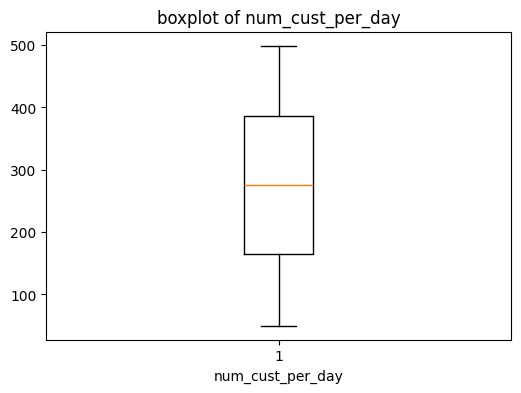

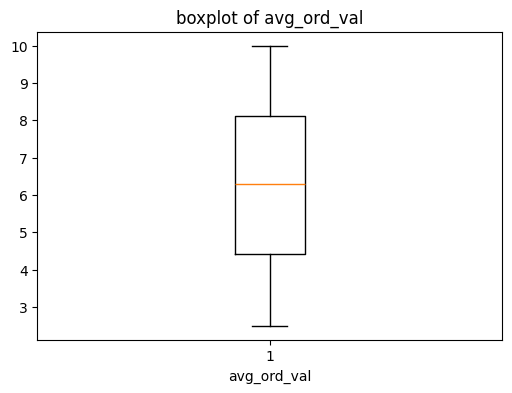

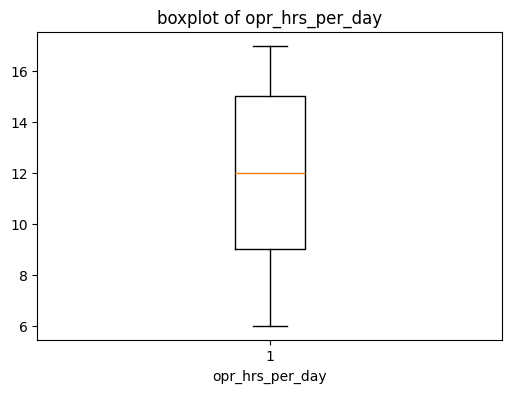

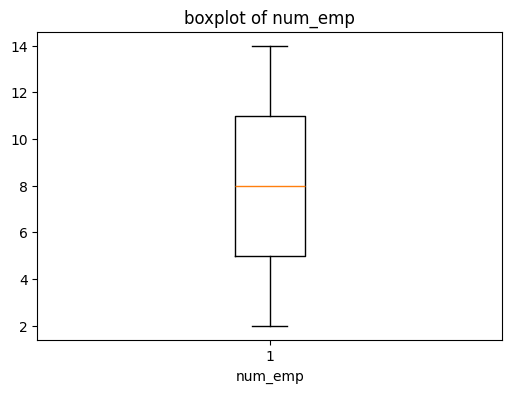

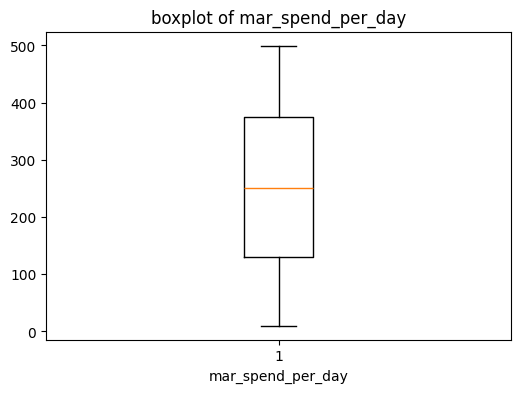

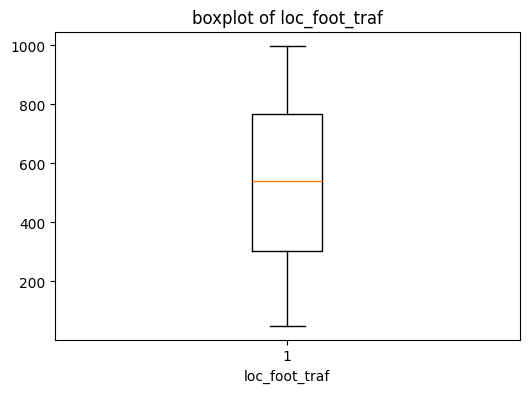

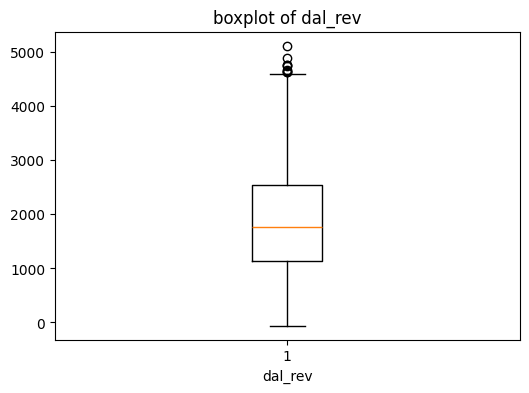

In [13]:
# creating function to create boxplots
def plot_boxplots(dataa, columns):
    for col in columns:
        plt.figure(figsize=(6, 4))
        plt.boxplot(dataa[col])
        plt.title(f'boxplot of {col}')
        plt.xlabel(col)
        plt.show()

# using the function to create boxplots to find outliers
plot_boxplots(data, data)

There are no outliers in any of the columns, except daily revenue column.

We will not drop the outliers yet, as the other data is not having any outliers, so there is a possibility that daily revenue anomalies indicate something. We will examine the daily revenue column later to understand what these outliers indicate.

## Examining Duplicates

In [14]:
# checking for total of duplicated rows in dataset
print(data.duplicated().sum())

0


There are no duplicates in the dataset.

# Data Analysis

We saw in the description of the dataset that the minimum value in the daily revenue column is '-58.95 USD'. This can't be correct, naturally, so we will now take a look at the only column that have outliers - daily revenue.

In [15]:
# creating a function to see outliers of a particular column of a dataset
def outliers(data, col):
    q1 = data[col].quantile(0.25) # first quartile
    q3 = data[col].quantile(0.75) # third quartile
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    outliers_set = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    return outliers_set

# checking outliers in the column
outliers(data, "dal_rev")

,num_cust_per_day,avg_ord_val,opr_hrs_per_day,num_emp,mar_spend_per_day,loc_foot_traf,dal_rev
66,416,9.98,17,10,483.07,576,4737.16
85,451,9.88,15,14,493.23,879,4750.98
701,494,9.57,13,8,385.76,686,4646.33
1143,473,9.79,9,14,479.41,303,4756.55
1171,495,9.95,17,4,11.79,417,4634.73
1318,484,9.10,17,6,467.00,657,4626.59
1593,453,9.93,12,7,474.97,563,5114.60
1719,495,9.63,12,3,356.89,139,4881.00
1842,465,9.75,10,14,412.11,384,4667.03


We will also check for more possible negative values in the column:

In [16]:
# checking for possible negative values
data.loc[data["dal_rev"] < 0, "dal_rev"]

1751   -58.95
Name: dal_rev, dtype: float64

As a total, we have single negative value and nine possible outliers.

We will replace the negative value with the mean of the column.

In [17]:
# replacing the negative value with mean of non-negative values of daily revenue column
mean_value = data[data["dal_rev"] >= 0]["dal_rev"].mean()
data["dal_rev"] = np.where(data["dal_rev"] < 0, mean_value, data["dal_rev"])

# checking the negative value row again
data.iloc[1751]

num_cust_per_day       66.000000
avg_ord_val             3.640000
opr_hrs_per_day         9.000000
num_emp                 2.000000
mar_spend_per_day      16.260000
loc_foot_traf         497.000000
dal_rev              1918.314572
Name: 1751, dtype: float64

Now we will check, are the outliers really outliers or not?

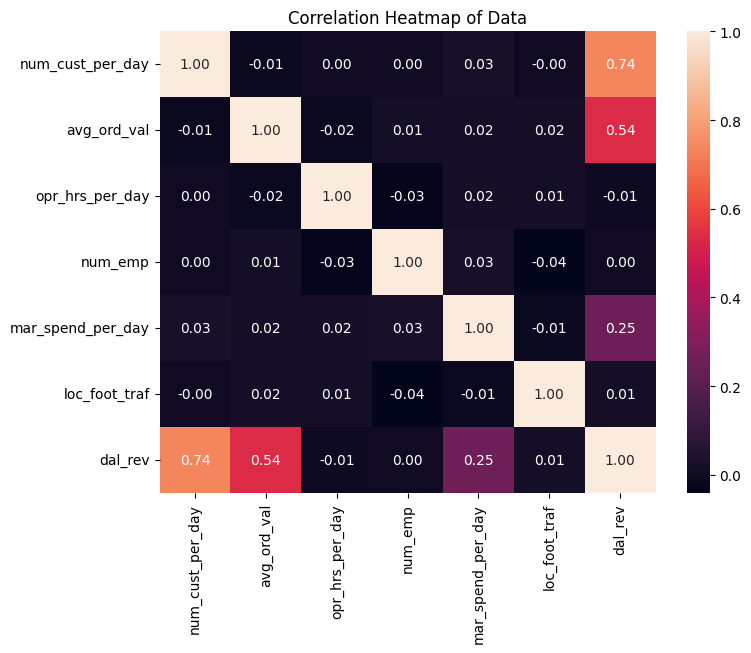

In [18]:
# checking correaltions between attributes
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap of Data")
plt.show()

We can see that:
- most of the variables are having no correlation to any attribute.
- the most correlated attributes are:
    - number of customers per day and daily revenue.
    - average order value and daily revenue.
    - marketing spend per day and daily revenue.

We will create graphs to see these correlations as plots:

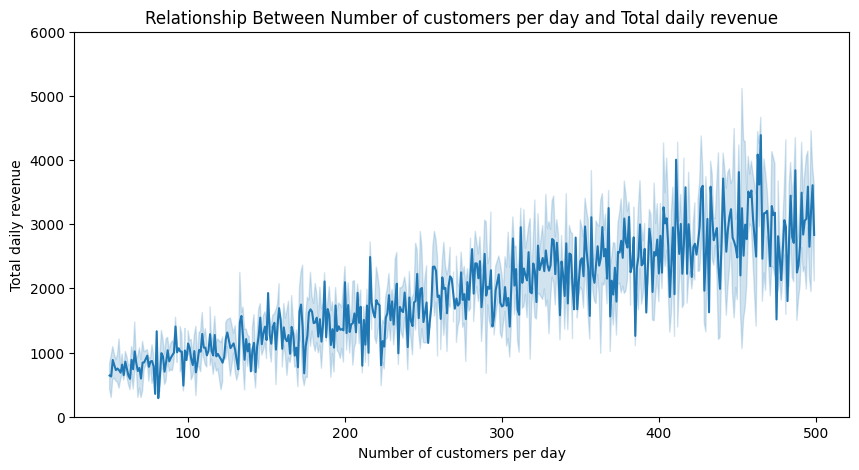

In [65]:
#  plot 1 for correlation
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="num_cust_per_day", y="dal_rev")
plt.xlabel("Number of customers per day")
plt.ylabel("Total daily revenue")
plt.title("Relationship Between Number of customers per day and Total daily revenue")
plt.ylim(0, 6000)
plt.show()

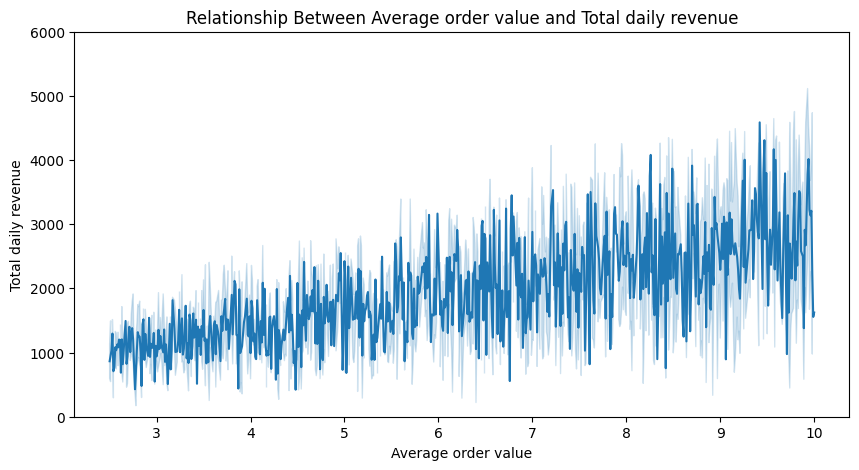

In [66]:
#  plot 2 for correlation
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x="avg_ord_val", y="dal_rev")
plt.xlabel("Average order value")
plt.ylabel("Total daily revenue")
plt.title("Relationship Between Average order value and Total daily revenue")
plt.ylim(0, 6000)
plt.show()

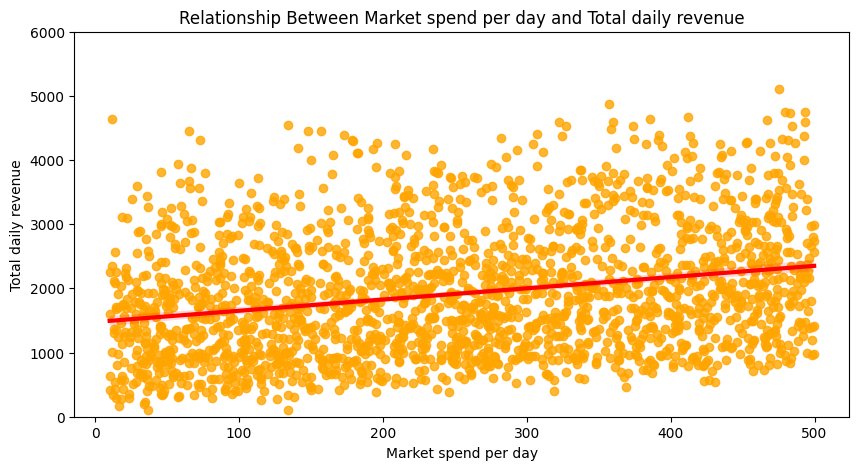

In [67]:
#  plot 3 for correlation
plt.figure(figsize=(10, 5))
sns.regplot(data=data, x="mar_spend_per_day", y="dal_rev", scatter_kws= {"color": "orange"}, line_kws={"color": "red", "linewidth": 3})
plt.xlabel("Market spend per day")
plt.ylabel("Total daily revenue")
plt.title("Relationship Between Market spend per day and Total daily revenue")
plt.ylim(0, 6000)
plt.show()

We will now plot a few more graphs to see relationship between some attributes:

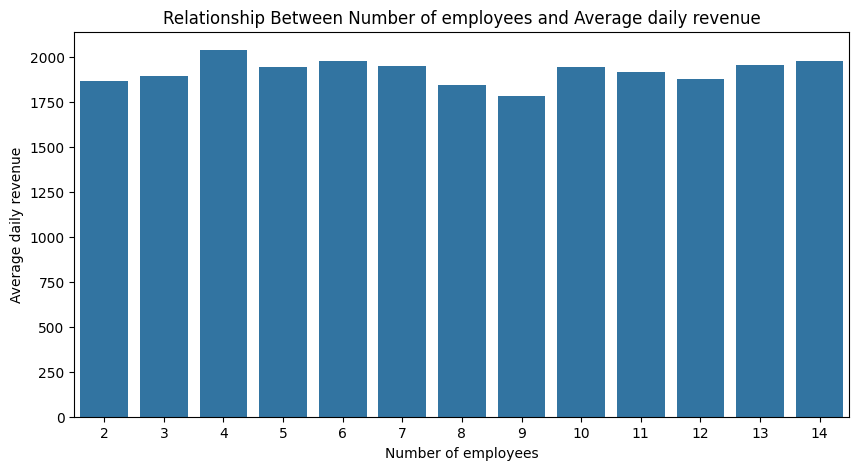

In [ ]:
# bar graph for checking relationship between two attributes
# we have checked the same thorugh querying also
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="num_emp", y="dal_rev", estimator=np.mean, legend=False, errorbar=None)
plt.xlabel("Number of employees")
plt.ylabel("Average daily revenue")
plt.title("Relationship Between Number of employees and Average daily revenue")
plt.show()

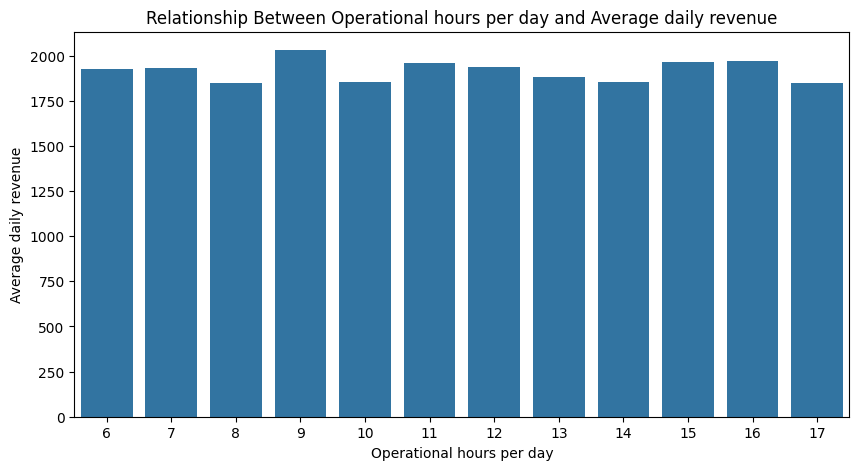

In [ ]:
# bar graph for checking relationship between two attributes
# we have checked the same thorugh querying also
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="opr_hrs_per_day", y="dal_rev", estimator=np.mean, legend=False, errorbar=None)
plt.xlabel("Operational hours per day")
plt.ylabel("Average daily revenue")
plt.title("Relationship Between Operational hours per day and Average daily revenue")
plt.show()

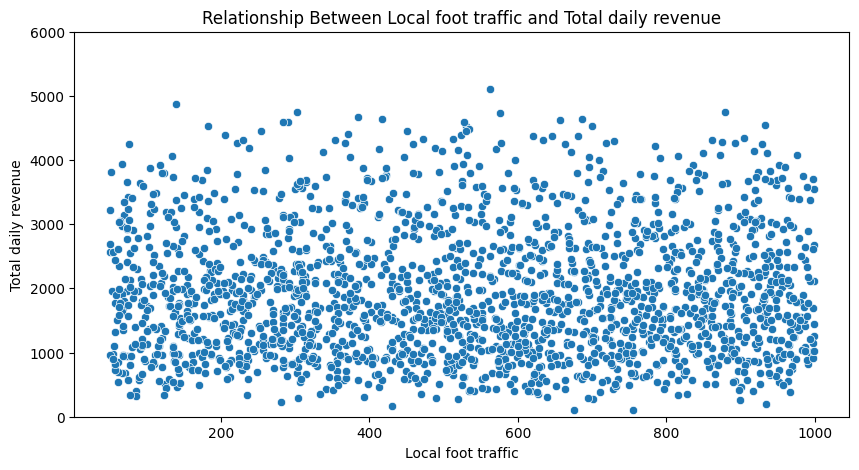

In [68]:
# bar graph for checking relationship between two attributes 
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="loc_foot_traf", y="dal_rev")
plt.xlabel("Local foot traffic")
plt.ylabel("Total daily revenue")
plt.title("Relationship Between Local foot traffic and Total daily revenue")
plt.ylim(0,6000)
plt.show()

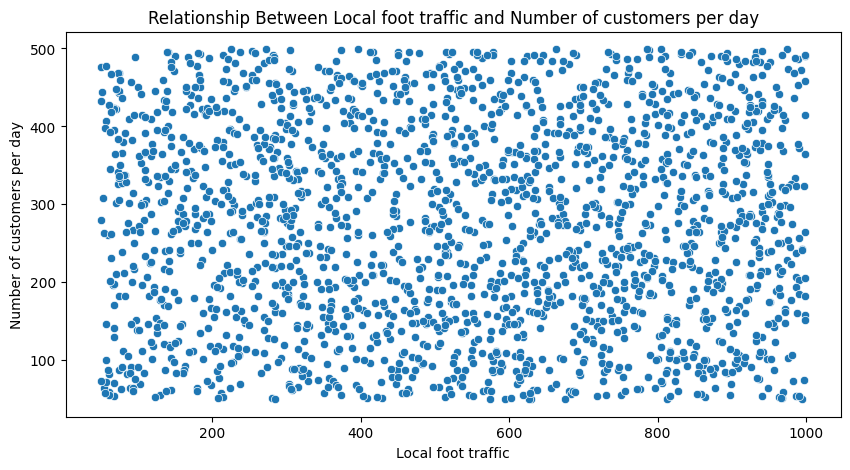

In [25]:
# bar graph for checking relationship between two attributes 
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="loc_foot_traf", y="num_cust_per_day")
plt.xlabel("Local foot traffic")
plt.ylabel("Number of customers per day")
plt.title("Relationship Between Local foot traffic and Number of customers per day")
plt.show()

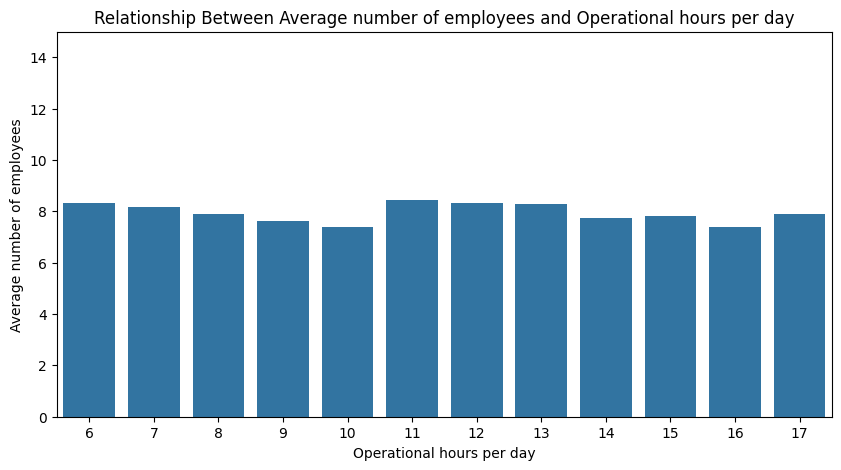

In [26]:
# bar graph for checking relationship between two attributes 
plt.figure(figsize=(10, 5))
sns.barplot(data=data, x="opr_hrs_per_day", y="num_emp", estimator=np.mean, legend=False, errorbar=None)
plt.xlabel("Operational hours per day")
plt.ylabel("Average number of employees")
plt.title("Relationship Between Average number of employees and Operational hours per day")
plt.ylim(0,15)
plt.show()

# Conclusion

As a conclusion, we can see that:
- the marketing is being done in-person and inside the shop.
- there is lack of employee efficiency and shop managememnt.
- local foot traiffc's conversion rate is low. 

The deep and clear insights and business recommendations based on this analysis have been presented separately in a presentation.